<a href="https://colab.research.google.com/github/vatsmanu728/National-e-Governance-Division/blob/main/Employee-Projects%20predictive%20mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mapping new employee with predicted best match (only one)




                                OUTPUT

Predictions for new employees without Department:
    Org Emp Code Employee Name Gender Tech/NonTech  \
503          NaN        Mayank   male         Tech   
504          NaN         Wario    NaN     Non Tech   
505          NaN         Yoshi    NaN         Tech   
506          NaN          Yeti    NaN         Tech   
507          NaN          Yuki    NaN     Non Tech   
508          NaN          Yuvi    NaN     Non Tech   
509          NaN          Zahi    NaN     Non Tech   
510          NaN          Zemi    NaN     Non Tech   

                           Designation    PredictedDepartment  
503                              AI/ML             DigiLocker  
504                         Office Boy                  ADMIN  
505   Associate - Frontend Development             DigiLocker  
506     Manager (Software Development)               MYSCHEME  
507  Graphic Designer cum Video Editor                   DPDP  
508                  Senior Consulta

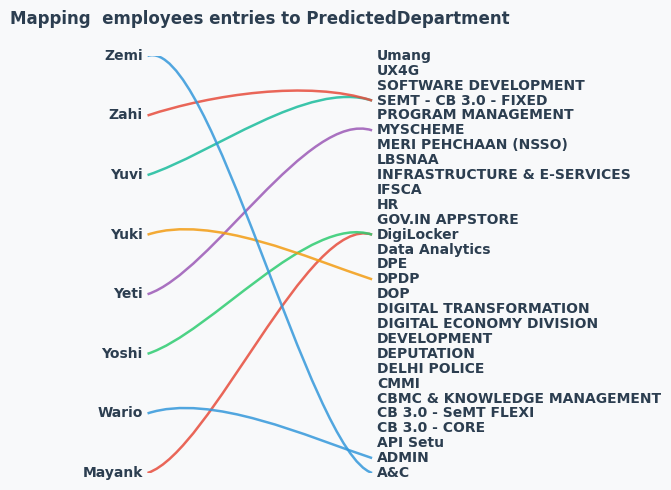

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

#import joblib

# 1. Loading from Google Sheet
sheet_id = "1fCM2LCJd-sakIMCBgxAi03KyTWVFCBxfqHE2BTSj-Ig"
sheet_name = "Sheet1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df = pd.read_csv(url)

# 2. Simple cleaning
#df['degree_clean'] = df['Degree'].str.lower().str.strip().fillna('unknown')
#df['skills_clean'] = df['Skills'].fillna('')

# 3. Defining variables - x, y
X = df[['Tech/NonTech',
        #'Education(Degree)',
        'Designation']]
y = df['Department']          ### If we want to find for multiple best match, use MultiLabelBinarizer + OneVsRestClassifier or ClassifierChain.

# 4. Using only rows with non-empty Department field for training
mask = y.notna() & (y != "")
X_train_data = X[mask]
y_train_data = y[mask]

# 5. Preprocessing using Column transformer

#preprocessor = ColumnTransformer(transformers=[
#    ('deg', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['degree_clean']),
#    ('skills', TfidfVectorizer(token_pattern='[^;]+'), 'skills_clean'),                        ###SPLIT ON SEMI-COLON
#    ('num', StandardScaler(), ['ExperienceYears'])
#], remainder='drop')


preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Tech/NonTech', 'Designation'])
], remainder='drop')


# 6. Pipelining (Only used RandomForest for now, will also compare with other like - logistic regression, KNN classifier, Decision Tree, Naive Bayes, Support Vector Machine
pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])

# 7. Splitting data into Train/Test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_data, y_train_data, test_size=0.50, random_state=42, #stratify=y_train_data
)                                                                           ### TEST SIZE IS 20%
#train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])  <- from https://youtu.be/i_LwzRVP7bg?feature=shared

# 8. Fitting RandomForestClassifier model
pipeline.fit(X_train, y_train)

# 9. Evaluating on available labelled data and producing report for RandomForest
y_pred = pipeline.predict(X_test)
#print("\nModel performance on training data: \n")
#print(classification_report(y_test, y_pred))

# 10. Predicting for new employee entries (rows without BestMatch)
new_entries = df[~mask]
if not new_entries.empty:
    predictions = pipeline.predict(new_entries[['Tech/NonTech',
                                                #'Education(Degree)',
                                                'Designation']])
    new_entries = new_entries.copy()
    new_entries['PredictedDepartment'] = predictions
    print("\n\n\n                                OUTPUT")
    print("\nPredictions for new employees without Department:")
    print(new_entries[['Org Emp Code', 'Employee Name', 'Gender', 'Tech/NonTech', 'Designation',
                       #'Job Type', 'Payroll', 'Hired Through', 'Reporting Manager Name'
                       #'DOB', 'DOJ',
                       'PredictedDepartment']])
    print("\n\n\n\n")
else:
    print("\nNo new employees without BestMatch found.\n\n")


# 11. Saving the model as a pickle file
#joblib.dump(pipeline, 'employee_team_mapper.pkl')


############################# VISUALISING WITH AllUVIAL DIAGRAM ###################################################

import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path

# new_entries is as a pandas DataFrame with columns 'Name' and 'PredictedBestMatch' instead of manually adding individual entries for new employees
data = new_entries[['Employee Name', 'PredictedDepartment']].to_dict(orient='records')


departments = [
    "A&C",
    "ADMIN",
    "API Setu",
    "CB 3.0 - CORE",
    "CB 3.0 - SeMT FLEXI",
    "CBMC & KNOWLEDGE MANAGEMENT",
    "CMMI",
    "DELHI POLICE",
    "DEPUTATION",
    "DEVELOPMENT",
    "DIGITAL ECONOMY DIVISION",
    "DIGITAL TRANSFORMATION",
    "DOP",
    "DPDP",
    "DPE",
    "Data Analytics",
    "DigiLocker",
    "GOV.IN APPSTORE",
    "HR",
    "IFSCA",
    "INFRASTRUCTURE & E-SERVICES",
    "LBSNAA",
    "MERI PEHCHAAN (NSSO)",
    "MYSCHEME",
    "PROGRAM MANAGEMENT",
    "SEMT - CB 3.0 - FIXED",
    "SOFTWARE DEVELOPMENT",
    "UX4G",
    "Umang"
]


# departments = [
#     "A&C",
#     "ADMIN",
#     "API SETU",
#     "CB 3.0 - CORE",
#     "CB 3.0 - SEMT FLEXI",
#     "CB 3.0 - SeMT FLEXI",
#     "CBMC & KNOWLEDGE MANAGEMENT",
#     "CMMI",
#     "DELHI POLICE",
#     "DEPUTATION",
#     "DEVELOPMENT",
#     "DIGITAL ECONOMY DIVISION",
#     "DIGITAL TRANSFORMATION",
#     "DOP",
#     "DPDP",
#     "DPE",
#     "Data Analytics",
#     "DigiLocker",
#     "GOV.IN APPSTORE",
#     "HR",
#     "IFSCA",
#     "INFRASTRUCTURE & E-SERVICES",
#     "LBSNAA",
#     "MERI PEHCHAAN (NSSO)",
#     "MYSCHEME",
#     "PROGRAM MANAGEMENT",
#     "SEMT - CB 3.0 - FIXED",
#     "SOFTWARE DEVELOPMENT",
#     "UX4G",
#     "Umang"
# ]


def normalize(text):
    return text.replace(" ", "").lower()

n_names = len(data)
n_depts = len(departments)
max_items = max(n_names, n_depts)

name_positions = {emp["Employee Name"]: (i / (n_names - 1) if n_names > 1 else 0.5)
                  for i, emp in enumerate(data)}
dept_positions = {dept: (i / (n_depts - 1) if n_depts > 1 else 0.5)
                  for i, dept in enumerate(departments)}

colors = ["#e74c3c", "#3498db", "#2ecc71", "#9b59b6", "#f39c12", "#1abc9c"]

# Smaller overall figure size & Increase figure width for more spacing
fig_height = max(3, min(5, max_items * 0.4))  # lower multiplier to shrink vertically
fig, ax = plt.subplots(figsize=(6, fig_height))  # wider figure
ax.axis('off')
fig.patch.set_facecolor("#f8f9fa")

# Draw names further left
for name, y in name_positions.items():
    ax.text(0.02, y, name, fontsize=10, ha='right', va='center',
            fontweight='bold', color="#2c3e50")

# Draw departments further right
for dept, y in dept_positions.items():
    ax.text(0.98, y, dept, fontsize=10, ha='left', va='center',
            fontweight='bold', color="#2c3e50")

# Draw smooth curves with updated control points for wider gap
for idx, emp in enumerate(data):
    name_y = name_positions[emp["Employee Name"]]
    matched_dept = next((dept for dept in departments
                         if normalize(dept) == normalize(emp["PredictedDepartment"])), None)
    if matched_dept:
        dept_y = dept_positions[matched_dept]
        verts = [
            (0.04, name_y),       # start closer to name text
            (0.30, name_y + 0.05),# first curve control point
            (0.70, dept_y + 0.05),# second curve control point
            (0.96, dept_y)        # end closer to department text
        ]
        codes = [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4]
        path = Path(verts, codes)
        patch = PathPatch(path, facecolor='none', lw=1.8,
                          edgecolor=colors[idx % len(colors)], alpha=0.85)
        ax.add_patch(patch)

plt.title("Mapping  employees entries to PredictedDepartment\n", fontsize=12, fontweight='bold',
          color="#2c3e50", pad=8)
plt.tight_layout()
plt.show()



\
\
\
\
\
\
### With Dummy Data (Sheet filled by me with Random values)


Model performance on training data: 

                      precision    recall  f1-score   support

            Accounts       1.00      1.00      1.00         4
       Data Analysis       1.00      1.00      1.00         2
             Finance       1.00      1.00      1.00         3
                  HR       1.00      1.00      1.00         4
              IndiAI       1.00      1.00      1.00         4
Programme Management       1.00      1.00      1.00         3

            accuracy                           1.00        20
           macro avg       1.00      1.00      1.00        20
        weighted avg       1.00      1.00      1.00        20




                                OUTPUT

Predictions for new employees without BestMatch:
    Employee ID    Name Degree              Skills  ExperienceYears  \
100      EID101   Sagar  Btech            DSA;DBMS              2.0   
101      EID102  Mayank  Btech  AI-ML;Data Science              NaN   
102      EID103   Ayush    Bba   

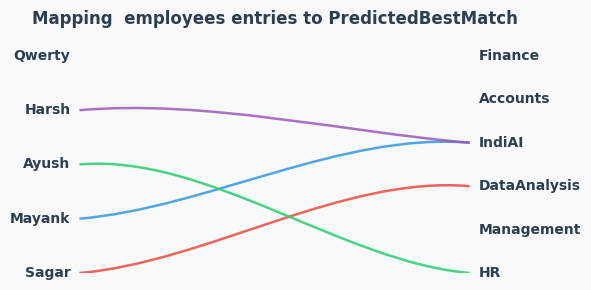

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

#import joblib

# 1. Loading from Google Sheet
sheet_id = "1mIBfcdkatxtN9CNuxT0JZFtAALPcclvSYVHTG2EVBts"
sheet_name = "Sheet1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df = pd.read_csv(url)

# 2. Simple cleaning
df['degree_clean'] = df['Degree'].str.lower().str.strip().fillna('unknown')
df['skills_clean'] = df['Skills'].fillna('')

# 3. Defining variables - x, y
X = df[['degree_clean', 'skills_clean', 'ExperienceYears']]
y = df['BestMatch']          ### If we want to find for multiple best match, use MultiLabelBinarizer + OneVsRestClassifier or ClassifierChain.

# 4. Using only rows with non-empty BestMatch for training
mask = y.notna() & (y != "")
X_train_data = X[mask]
y_train_data = y[mask]

# 5. Preprocessing using Column transformer
preprocessor = ColumnTransformer(transformers=[
    ('deg', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['degree_clean']),
    ('skills', TfidfVectorizer(token_pattern='[^;]+'), 'skills_clean'),                        ###SPLIT ON SEMI-COLON
    ('num', StandardScaler(), ['ExperienceYears'])
], remainder='drop')

# 6. Pipelining (Only used RandomForest for now, will also compare with other like - logistic regression, KNN classifier, Decision Tree, Naive Bayes, Support Vector Machine
pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])

# 7. Splitting data into Train/Test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_data, y_train_data, test_size=0.20, random_state=42, stratify=y_train_data
)                                                                           ### TEST SIZE IS 20%
#train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])  <- from https://youtu.be/i_LwzRVP7bg?feature=shared

# 8. Fitting RandomForestClassifier model
pipeline.fit(X_train, y_train)

# 9. Evaluating on available labelled data and producing report for RandomForest
y_pred = pipeline.predict(X_test)
print("\nModel performance on training data: \n")
print(classification_report(y_test, y_pred))

# 10. Predicting for new employee entries (rows without BestMatch)
new_entries = df[~mask]
if not new_entries.empty:
    predictions = pipeline.predict(new_entries[['degree_clean', 'skills_clean', 'ExperienceYears']])
    new_entries = new_entries.copy()
    new_entries['PredictedBestMatch'] = predictions
    print("\n\n\n                                OUTPUT")
    print("\nPredictions for new employees without BestMatch:")
    print(new_entries[['Employee ID', 'Name', 'Degree', 'Skills', 'ExperienceYears',
                       #'AssignedProject',
                       'PredictedBestMatch']])
    print("\n\n\n\n")
else:
    print("\nNo new employees without BestMatch found.\n\n")


# 11. Saving the model as a pickle file
#joblib.dump(pipeline, 'employee_team_mapper.pkl')


############################# VISUALISING WITH AllUVIAL DIAGRAM ###################################################

import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path

# new_entries is as a pandas DataFrame with columns 'Name' and 'PredictedBestMatch' instead of manually adding individual entries for new employees
data = new_entries[['Name', 'PredictedBestMatch']].to_dict(orient='records')

departments = [ "HR", "Management", "DataAnalysis", "IndiAI", "Accounts", "Finance"
]

def normalize(text):
    return text.replace(" ", "").lower()

n_names = len(data)
n_depts = len(departments)
max_items = max(n_names, n_depts)

name_positions = {emp["Name"]: (i / (n_names - 1) if n_names > 1 else 0.5)
                  for i, emp in enumerate(data)}
dept_positions = {dept: (i / (n_depts - 1) if n_depts > 1 else 0.5)
                  for i, dept in enumerate(departments)}

colors = ["#e74c3c", "#3498db", "#2ecc71", "#9b59b6", "#f39c12", "#1abc9c"]

fig_height = max(3, min(8, max_items * 0.5))
fig, ax = plt.subplots(figsize=(6, fig_height))
ax.axis('off')
fig.patch.set_facecolor("#f8f9fa")

# Draw names
for name, y in name_positions.items():
    ax.text(0.05, y, name, fontsize=10, ha='right', va='center',
            fontweight='bold', color="#2c3e50")

# Draw departments
for dept, y in dept_positions.items():
    ax.text(0.95, y, dept, fontsize=10, ha='left', va='center',
            fontweight='bold', color="#2c3e50")

# Draw smooth curves
for idx, emp in enumerate(data):
    name_y = name_positions[emp["Name"]]
    matched_dept = next((dept for dept in departments
                         if normalize(dept) == normalize(emp["PredictedBestMatch"])), None)
    if matched_dept:
        dept_y = dept_positions[matched_dept]
        verts = [
            (0.07, name_y),
            (0.35, name_y + 0.05),
            (0.65, dept_y + 0.05),
            (0.93, dept_y)
        ]
        codes = [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4] #USING BEZIER CURVE INSTEAD OF STRAIGHT LINES
        path = Path(verts, codes)
        patch = PathPatch(path, facecolor='none', lw=1.8,
                          edgecolor=colors[idx % len(colors)], alpha=0.85)
        ax.add_patch(patch)

plt.title("Mapping  employees entries to PredictedBestMatch\n", fontsize=12, fontweight='bold',
          color="#2c3e50", pad=8)
plt.tight_layout()
plt.show()



(Below code is for graph only -
Since the scope of new_entries has expired, so no output)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path

# Example: Using your DataFrame instead of manual data
# new_entries is assumed to be a pandas DataFrame with columns 'Name' and 'PredictedBestMatch'
data = new_entries[['Name', 'PredictedBestMatch']].to_dict(orient='records')

departments = ["IndiAI", "DataAnalysis", "HR", "Management", "Finance", "Accounts"]

def normalize(text):
    return text.replace(" ", "").lower()

n_names = len(data)
n_depts = len(departments)
max_items = max(n_names, n_depts)

name_positions = {emp["Name"]: (i / (n_names - 1) if n_names > 1 else 0.5)
                  for i, emp in enumerate(data)}
dept_positions = {dept: (i / (n_depts - 1) if n_depts > 1 else 0.5)
                  for i, dept in enumerate(departments)}

colors = ["#e74c3c", "#3498db", "#2ecc71", "#9b59b6", "#f39c12", "#1abc9c"]

fig_height = max(3, min(8, max_items * 0.5))
fig, ax = plt.subplots(figsize=(6, fig_height))
ax.axis('off')
fig.patch.set_facecolor("#f8f9fa")

# Draw names
for name, y in name_positions.items():
    ax.text(0.05, y, name, fontsize=10, ha='right', va='center',
            fontweight='bold', color="#2c3e50")

# Draw departments
for dept, y in dept_positions.items():
    ax.text(0.95, y, dept, fontsize=10, ha='left', va='center',
            fontweight='bold', color="#2c3e50")

# Draw smooth curves
for idx, emp in enumerate(data):
    name_y = name_positions[emp["Name"]]
    matched_dept = next((dept for dept in departments
                         if normalize(dept) == normalize(emp["PredictedBestMatch"])), None)
    if matched_dept:
        dept_y = dept_positions[matched_dept]
        verts = [
            (0.07, name_y),
            (0.35, name_y + 0.05),
            (0.65, dept_y + 0.05),
            (0.93, dept_y)
        ]
        codes = [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4]
        path = Path(verts, codes)
        patch = PathPatch(path, facecolor='none', lw=1.8,
                          edgecolor=colors[idx % len(colors)], alpha=0.85)
        ax.add_patch(patch)

plt.title("MAPPING", fontsize=12, fontweight='bold',
          color="#2c3e50", pad=8)
plt.tight_layout()
plt.show()


NameError: name 'new_entries' is not defined

\
\
\
\
\
\
\
\
\
\
\
# Below code trains on full 100 entries - bcoz test_size is not defined in train_test_split


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Load dataset
sheet_id = "YOUR_SHEET_ID"
sheet_name = "Sheet1"
url = f"https://docs.google.com/spreadsheets/d/1mIBfcdkatxtN9CNuxT0JZFtAALPcclvSYVHTG2EVBts/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df = pd.read_csv(url)

# 2. Quick cleaning
df['degree_norm'] = df['Degree'].str.lower().str.strip().fillna('unknown')
df['skills'] = df['Skills'].fillna('')

# 3. X, y
X = df[['degree_norm', 'skills', 'ExperienceYears']]
y = df['BestMatch']

# Only use rows with non-empty BestMatch for training
train_mask = y.notna() & (y != "")
X_train = X[train_mask]
y_train = y[train_mask]

# 4. Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('deg', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['degree_norm']),
    ('skills', TfidfVectorizer(token_pattern='[^;]+'), 'skills'),  # split on semi-colon
    ('num', StandardScaler(), ['ExperienceYears'])
], remainder='drop')

# 5. Pipeline
pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])

# 6. Train the model
pipeline.fit(X_train, y_train)

# 7. Evaluate on available labeled data (optional)
X_eval = X_train
y_eval = y_train
y_pred_eval = pipeline.predict(X_eval)
#print("\nModel performance on training data:")
print(classification_report(y_eval, y_pred_eval))

# 8. Find new employee rows without BestMatch
new_entries = df[df['BestMatch'].isna() | (df['BestMatch'] == "")]
if not new_entries.empty:
    new_X = new_entries[['degree_norm', 'skills', 'ExperienceYears']]
    predicted_projects = pipeline.predict(new_X)
    new_entries = new_entries.copy()
    new_entries['PredictedBestMatch'] = predicted_projects

    print("\nPredictions for new employees without BestMatch:")
    print(new_entries[['Name', 'PredictedBestMatch']])
else:
    print("\nNo new employee entries found without BestMatch.")


                      precision    recall  f1-score   support

            Accounts       1.00      1.00      1.00        18
       Data Analysis       1.00      1.00      1.00        12
             Finance       1.00      1.00      1.00        15
                  HR       1.00      1.00      1.00        19
              IndiAI       1.00      1.00      1.00        19
Programme Management       1.00      1.00      1.00        17

            accuracy                           1.00       100
           macro avg       1.00      1.00      1.00       100
        weighted avg       1.00      1.00      1.00       100


Predictions for new employees without BestMatch:
       Name PredictedBestMatch
100   Sagar      Data Analysis
101  Mayank             IndiAI
102   Ayush                 HR
103   Harsh             IndiAI


\
\
\
\
\
\
\
\
\
\
\
# Using Gspread and oauth2client.service_account for importing ServiceAccountCredentials

In [ ]:
###SAVING YOUR JSON CREDENTIALS AS AN ENVIRONMENT VARIABLE
import os
os.environ["GCP_SERVICE_ACCOUNT_JSON"] = """{
  "type": "service_account",
  "project_id": "...",
  "private_key_id": "...",
  "private_key": "...",
  "client_email": "...",
  "client_id": "...",
  "auth_uri": "...",
  "token_uri": "...",
  "auth_provider_x509_cert_url": "...",
  "client_x509_cert_url": "..."
}"""

###LOAD CREDENTIALS FROM THE ENVIRONMENT IN YOUR PYTHIN SCRIPT
import os
import json
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# 1. Get JSON string from env and parse it
service_account_info = json.loads(os.environ["GCP_SERVICE_ACCOUNT_JSON"])

# 2. Connect to Google Sheets
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_dict(service_account_info, scope)
client = gspread.authorize(creds)

# 3. Open the sheet
sheet = client.open_by_key("1mIBfcdkatxtN9CNuxT0JZFtAALPcclvSYVHTG2EVBts").worksheet("Sheet1")

###

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# ======== 1. Google Sheets connection ========
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name("service_account.json", scope)  # your downloaded credentials
client = gspread.authorize(creds)

sheet = client.open_by_key("1mIBfcdkatxtN9CNuxT0JZFtAALPcclvSYVHTG2EVBts").worksheet("Sheet1")

# ======== 2. Load sheet into DataFrame ========
data = sheet.get_all_records()
df = pd.DataFrame(data)

# ======== 3. Clean data ========
df.columns = df.columns.str.strip()
df['degree_norm'] = df['Degree'].str.lower().str.strip().fillna('unknown')
df['skills'] = df['Skills'].fillna('')

X = df[['degree_norm', 'skills', 'ExperienceYears']]
y = df['BestMatch']

# ======== 4. Preprocessor ========
preprocessor = ColumnTransformer(transformers=[
    ('deg', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['degree_norm']),
    ('skills', TfidfVectorizer(token_pattern='[^;]+'), 'skills'),
    ('num', StandardScaler(), ['ExperienceYears'])
])

pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])

# ======== 5. Train & predict ========
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# ======== 6. Predict for all rows & update sheet ========
df['PredictedBestMatch'] = pipeline.predict(X)

# Write back predictions (assuming "PredictedBestMatch" is a new column in the sheet)
col_index = len(df.columns)  # get last column position
for i, value in enumerate(df['PredictedBestMatch'], start=2):  # start=2 because row 1 is header
    sheet.update_cell(i, col_index, value)


AttributeError: module 'OpenSSL.crypto' has no attribute 'load_pkcs12'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# ======== 1. Google Sheets connection ========
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name("service_account.json", scope)  # your downloaded credentials
client = gspread.authorize(creds)

sheet = client.open_by_key("1mIBfcdkatxtN9CNuxT0JZFtAALPcclvSYVHTG2EVBts").worksheet("Sheet1")

# ======== 2. Load sheet into DataFrame ========
data = sheet.get_all_records()
df = pd.DataFrame(data)

# ======== 3. Clean data ========
df.columns = df.columns.str.strip()
df['degree_norm'] = df['Degree'].str.lower().str.strip().fillna('unknown')
df['skills'] = df['Skills'].fillna('')

X = df[['degree_norm', 'skills', 'ExperienceYears']]
y = df['BestMatch']

# ======== 4. Preprocessor ========
preprocessor = ColumnTransformer(transformers=[
    ('deg', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['degree_norm']),
    ('skills', TfidfVectorizer(token_pattern='[^;]+'), 'skills'),
    ('num', StandardScaler(), ['ExperienceYears'])
])

pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])

# ======== 5. Train & predict ========
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# ======== 6. Predict for all rows & update sheet ========
df['PredictedBestMatch'] = pipeline.predict(X)

# Write back predictions (assuming "PredictedBestMatch" is a new column in the sheet)
col_index = len(df.columns)  # get last column position
for i, value in enumerate(df['PredictedBestMatch'], start=2):  # start=2 because row 1 is header
    sheet.update_cell(i, col_index, value)


FileNotFoundError: [Errno 2] No such file or directory: 'service_account.json'

\
\
\
\
\
\
\
\
\
\
\
# For more than one prediction of best match

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# 1. Loading from Google Sheet
sheet_id = "1fCM2LCJd-sakIMCBgxAi03KyTWVFCBxfqHE2BTSj-Ig"
sheet_name = "Sheet1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df = pd.read_csv(url)

# 2. Define features and target
X = df[['Tech/NonTech', 'Designation']]
y = df['Department']          ### If we want to find for multiple best match, use MultiLabelBinarizer + OneVsRestClassifier or ClassifierChain.


# 3. Train only on rows with non-empty Department field
mask = y.notna() & (y != "")
X_train_data = X[mask]
y_train_data = y[mask]

# 4. Preprocessing using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Tech/NonTech', 'Designation'])
], remainder='drop')

# 5. Pipelining (Only used RandomForest for now, will also compare with other like - logistic regression, KNN classifier, Decision Tree, Naive Bayes, Support Vector Machine
pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])

# 6. Splitting data into Train/Test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_data, y_train_data,
                                                    test_size = 0.50, random_state=42, #stratify=y_train_data
)                                               ### TEST SIZE IS 50%
#train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])  <- from https://youtu.be/i_LwzRVP7bg?feature=shared

# 7. Fitting model (RandomForestClassifier)
pipeline.fit(X_train, y_train)

# 9. Evaluating on available labelled data and producing report for RandomForest
y_pred = pipeline.predict(X_test)
#print("\nModel performance on training data: \n")
#print(classification_report(y_test, y_pred))

# 8. Predict for new employee entries
new_entries = df[~mask]
if not new_entries.empty:
    probs = pipeline.predict_proba(new_entries[['Tech/NonTech', 'Designation']])
    classes = pipeline.named_steps['clf'].classes_

    # Get top-3 predictions
    top3_idx = np.argsort(probs, axis=1)[:, ::-1][:, :3]
    top3_labels = classes[top3_idx]
    top3_probs = np.take_along_axis(probs, top3_idx, axis=1)

    new_entries = new_entries.copy()
    new_entries['BestMatch1'] = top3_labels[:, 0]
    new_entries['Match_Prob1'] = (top3_probs[:, 0] * 100).round(1).astype(str) + ' %'
    new_entries['BestMatch2'] = top3_labels[:, 1]
    new_entries['Match_Prob2'] = (top3_probs[:, 1] * 100).round(1).astype(str) + ' %'
    new_entries['BestMatch3'] = top3_labels[:, 2]
    new_entries['Match_Prob3'] = (top3_probs[:, 2] * 100).round(1).astype(str) + ' %'


    # print("\nPredictions for new employees without Department:\n")
    # print(new_entries[['Employee Name', 'Designation', 'Tech/NonTech']])
    # print('\n')
    # print(new_entries[['BestMatch1', 'Match_Prob1', 'BestMatch2', 'Match_Prob2', 'BestMatch3', 'Match_Prob3']])


    print("\n      Predictions for new employees without Department:")
    display(new_entries[['Employee Name', 'Designation', 'Tech/NonTech',
                         'BestMatch1', 'Match_Prob1', 'BestMatch2', 'Match_Prob2', 'BestMatch3', 'Match_Prob3']])

else:
    print("\nNo new employees without BestMatch found.\n")


# 11. Saving the model as a pickle file
#joblib.dump(pipeline, 'employee_team_mapper.pkl')


######################################## SANKEY DIAGRAM ##################################################

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

if not new_entries.empty:
    # --- Clean column names ---
    new_entries.columns = new_entries.columns.str.strip()

    # --- Convert "xx.x %" to floats ---
    prob_cols = [f"Match_Prob{i}" for i in range(1, 4)]
    for col in prob_cols:
        new_entries[col] = (
            new_entries[col]
            .astype(str)
            .str.replace('%', '', regex=False)
            .str.strip()
            .replace('', '0')
            .astype(float)
        )

    # --- Sort employees & departments alphabetically ---
    employees = sorted(new_entries["Employee Name"].unique().tolist())
    projects = sorted(set(
        new_entries["BestMatch1"].dropna().tolist() +
        new_entries["BestMatch2"].dropna().tolist() +
        new_entries["BestMatch3"].dropna().tolist()
    ))

    # --- Build labels ---
    labels = employees + projects
    label_to_index = {label: i for i, label in enumerate(labels)}

    # --- Assign colors (one per employee) ---
    employee_colors = px.colors.qualitative.Plotly
    color_map = {emp: employee_colors[i % len(employee_colors)] for i, emp in enumerate(employees)}

    # --- Build links ---
    links = []
    link_colors = []
    for _, row in new_entries.iterrows():
        emp = row["Employee Name"]
        for i in range(1, 4):
            proj = row[f"BestMatch{i}"]
            prob = row[f"Match_Prob{i}"]
            if pd.notnull(proj) and prob > 0:
                links.append({
                    "source": label_to_index[emp],
                    "target": label_to_index[proj],
                    "value": prob
                })
                link_colors.append(color_map[emp])

    # --- Create Sankey ---
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels
        ),
        link=dict(
            source=[l["source"] for l in links],
            target=[l["target"] for l in links],
            value=[l["value"] for l in links],
            color=link_colors
        )
    )])

    fig.update_layout(
        title_text="One-to-Many Employee → Project Mapping ",
        font_size=12
    )
    fig.show()

else:
    print("No new employees without Department found.")

##### PROBABILISTIC GRAPH ###########################################

# import pandas as pd
# import networkx as nx
# import matplotlib.pyplot as plt

# # --- Clean probability columns ---
# for i in range(1, 3+1):
#     col = f"Match_Prob{i}"
#     new_entries[col] = (
#         new_entries[col]
#         .astype(str)
#         .str.replace('%', '', regex=False)
#         .str.strip()
#         .replace('', '0')
#         .astype(float)
#     )

# # Separate employees and projects
# employees = sorted(new_entries["Employee Name"].unique().tolist())
# projects = sorted(set(
#     new_entries["BestMatch1"].dropna().tolist() +
#     new_entries["BestMatch2"].dropna().tolist() +
#     new_entries["BestMatch3"].dropna().tolist()
# ))

# # --- Build graph ---
# G = nx.DiGraph()

# # Add edges with weights
# for _, row in new_entries.iterrows():
#     emp = row["Employee Name"]
#     for i in range(1, 4):
#         proj = row[f"BestMatch{i}"]
#         prob = row[f"Match_Prob{i}"]
#         if pd.notnull(proj) and prob > 0:
#             G.add_edge(emp, proj, weight=prob, label=f"{prob:.1f}%")

# # --- Force employees on top, projects on bottom ---
# pos = {}
# # Employees along the top row (y=1)
# for idx, emp in enumerate(employees):
#     pos[emp] = (idx*10, 1)
# # Projects along the bottom row (y=0)
# for idx, proj in enumerate(projects):
#     pos[proj] = (idx*5, 0)

# # --- Draw graph ---
# plt.figure(figsize=(12, 6))
# nx.draw_networkx_nodes(G, pos, node_color="#d6e0f5", node_size=1500, edgecolors="black")
# nx.draw_networkx_labels(G, pos, font_size=9, font_weight="bold")
# nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=15, edge_color="gray")

# # Draw edge labels for probabilities
# edge_labels = nx.get_edge_attributes(G, 'label')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# plt.title("Probabilistic Employee → Project Graph", fontsize=14)
# plt.axis("off")
# plt.tight_layout()
# plt.show()



      Predictions for new employees without Department:


,Employee Name,Designation,Tech/NonTech,BestMatch1,Match_Prob1,BestMatch2,Match_Prob2,BestMatch3,Match_Prob3
503,Aardneehtay,Manager (Software Development),Tech,MYSCHEME,43.8 %,MERI PEHCHAAN (NSSO),39.0 %,DigiLocker,6.0 %
504,edawrad atkuy,Graphic Designer cum Video Editor,Non Tech,DPDP,66.5 %,Umang,7.5 %,ADMIN,4.2 %
505,sm jaravuy,Senior Consultant,Non Tech,SEMT - CB 3.0 - FIXED,96.5 %,Umang,3.5 %,UX4G,0.0 %
506,feetal dihaz,Consultant,Non Tech,SEMT - CB 3.0 - FIXED,96.6 %,CMMI,3.4 %,UX4G,0.0 %
507,nahk amimez,Deputy Manager (A&C),Non Tech,A&C,71.1 %,DigiLocker,4.9 %,PROGRAM MANAGEMENT,4.0 %
508,MAYANK,Software engineer & machine learning,tech,MERI PEHCHAAN (NSSO),24.0 %,DigiLocker,16.9 %,Umang,12.5 %
509,Saroj mam,Senior Consultant - Big data analytics,tech,CB 3.0 - SeMT FLEXI,31.5 %,MERI PEHCHAAN (NSSO),17.1 %,DigiLocker,12.8 %
